# Importing libraries

In [80]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

color = sns.color_palette()
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Reading the fifa 20 game csv file

In [2]:
fifa=pd.read_csv("fifa_20.csv")

In [3]:
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


# converting date of birth into datetime format

In [5]:
fifa.dob=pd.to_datetime(fifa.dob)

# creating a dataframe with  potential >85 and overall less than 80

In [6]:
fifa_potential=fifa[(fifa.potential>85 )& (fifa.overall<80)]

# players with 
# potential more than 85 and
# overall less than 80 but more than 70

In [7]:
fifa_potential_ready=fifa_potential[(fifa_potential.overall<80)&(fifa_potential.overall>70)]

# potential GK

In [8]:
position="GK"
fifa_potential_ready_GK=fifa_potential_ready[fifa.player_positions.str.contains(position)]

In [9]:
fifa_potential_ready_GK

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
572,231691,https://sofifa.com/player/231691/alban-lafont/...,A. Lafont,Alban Lafont,20,1999-01-23,193,82,France,FC Nantes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
753,225116,https://sofifa.com/player/225116/alex-meret/20...,A. Meret,Alex Meret,22,1997-03-22,190,83,Italy,Napoli,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,228413,https://sofifa.com/player/228413/emil-audero/2...,E. Audero,Emil Audero,22,1997-01-18,192,83,Italy,Sampdoria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,243952,https://sofifa.com/player/243952/andriy-lunin/...,A. Lunin,Andriy Lunin,20,1999-02-11,191,80,Ukraine,Real Valladolid CF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1616,234102,https://sofifa.com/player/234102/ionut-andrei-...,I. Radu,Ionuţ Andrei Radu,22,1997-05-28,188,78,Romania,Genoa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,228736,https://sofifa.com/player/228736/wuilker-farin...,W. Faríñez,Wuilker Faríñez,21,1998-02-15,181,81,Venezuela,Millonarios FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


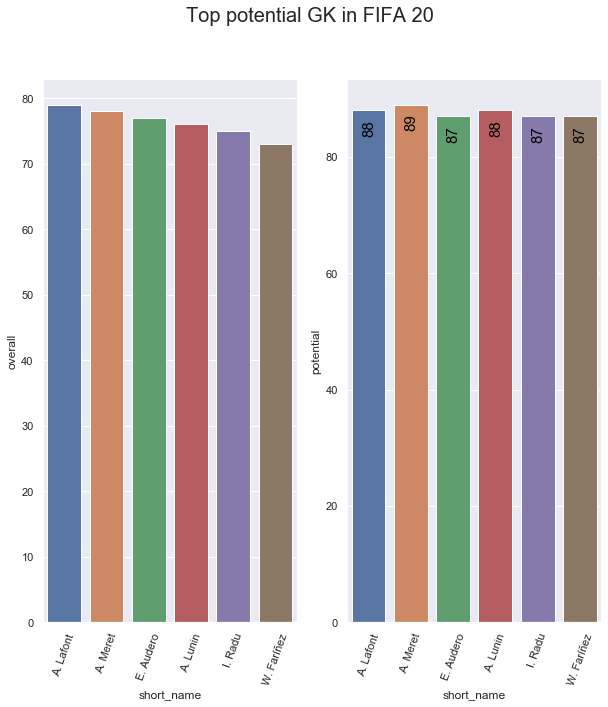

In [94]:
figure,ax=plt.subplots(1,2)
figure.set_size_inches(10,10)
figure=plt.gcf()
sns.set(style='darkgrid')
sns.barplot(fifa_potential_ready_GK.short_name,fifa_potential_ready_GK.overall,ax=ax[0])
ax[0].tick_params(axis="x", rotation=70)
sns.barplot(fifa_potential_ready_GK.short_name,fifa_potential_ready_GK.potential,ax=ax[1])
count=0
for i in fifa_potential_ready_GK.potential:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
figure.suptitle('Top potential GK in FIFA 20 ',fontsize=20)
ax[1].tick_params(axis="x", rotation=70)

In [81]:
def scatter_plot(cnt_srs, color):
   trace = go.Scatter(
       x=cnt_srs.index[::-1],
       y=cnt_srs.values[::-1],
       showlegend=False,
       marker=dict(
           color=color,
       ),
   )
   return trace
cnt_srs = fifa_potential_ready_GK.value_eur
cnt_srs.index = fifa_potential_ready_GK.short_name
trace1 = scatter_plot(cnt_srs, 'red')
subtitles = ["Potential GK player values(Euros) "]
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                         subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')

# Top Potential LB players in FIFA 20

In [12]:
position="LB"
fifa_potential_LB=fifa_potential_ready[fifa.player_positions.str.contains(position)]

In [13]:
fifa_potential_LB

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
585,235212,https://sofifa.com/player/235212/achraf-hakimi...,A. Hakimi,Achraf Hakimi Mouh,20,1998-11-04,181,73,Morocco,Borussia Dortmund,...,78+2,75+2,75+2,75+2,78+2,77+2,73+2,73+2,73+2,77+2
588,238476,https://sofifa.com/player/238476/dan-axel-zaga...,D. Zagadou,Dan-Axel Zagadou,20,1999-06-03,196,90,France,Borussia Dortmund,...,67+2,73+2,73+2,73+2,67+2,70+2,78+2,78+2,78+2,70+2
1261,226491,https://sofifa.com/player/226491/kieran-tierne...,K. Tierney,Kieran Tierney,22,1997-06-05,178,78,Scotland,Arsenal,...,75+2,73+2,73+2,73+2,75+2,75+2,72+2,72+2,72+2,75+2
1619,235883,https://sofifa.com/player/235883/ryan-sessegno...,R. Sessegnon,Ryan Sessegnon,19,2000-05-18,178,71,England,Tottenham Hotspur,...,71+2,67+2,67+2,67+2,71+2,70+2,64+2,64+2,64+2,70+2
3289,234396,https://sofifa.com/player/234396/alphonso-davi...,A. Davies,Alphonso Davies,18,2000-11-02,181,72,Canada,FC Bayern München,...,65+2,61+2,61+2,61+2,65+2,63+2,60+2,60+2,60+2,63+2


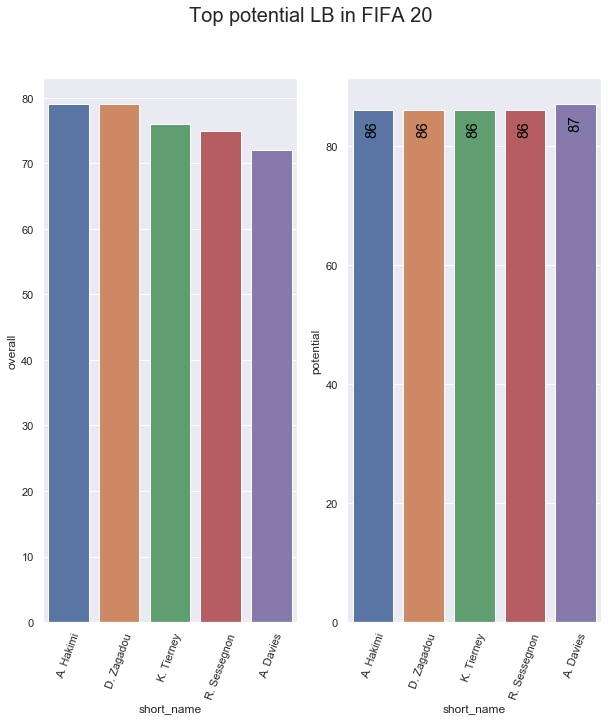

In [95]:
figure,ax=plt.subplots(1,2)
figure.set_size_inches(10,10)
figure=plt.gcf()
sns.set(style='darkgrid')
sns.barplot(fifa_potential_LB.short_name,fifa_potential_LB.overall,ax=ax[0])
sns.barplot(fifa_potential_LB.short_name,fifa_potential_LB.potential,ax=ax[1])
count=0
for i in fifa_potential_LB.potential:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
figure.suptitle('Top potential LB in FIFA 20 ',fontsize=20)
ax[0].tick_params(axis="x", rotation=70)
ax[1].tick_params(axis="x", rotation=70)

In [83]:
def scatter_plot(cnt_srs, color):
   trace = go.Scatter(
       x=cnt_srs.index[::-1],
       y=cnt_srs.values[::-1],
       showlegend=False,
       marker=dict(
           color=color,
       ),
   )
   return trace
cnt_srs = fifa_potential_LB.value_eur
cnt_srs.index = fifa_potential_LB.short_name
trace1 = scatter_plot(cnt_srs, 'red')
subtitles = ["Potential LB player values(Euros)"]
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                         subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')

# TOP potential players in RB position

In [16]:
position="RB"
fifa_potential_RB=fifa_potential_ready[fifa.player_positions.str.contains(position)]

In [17]:
fifa_potential_RB

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
571,229880,https://sofifa.com/player/229880/aaron-wan-bis...,A. Wan-Bissaka,Aaron Wan-Bissaka,21,1997-11-26,183,72,England,Manchester United,...,78+2,74+2,74+2,74+2,78+2,78+2,76+2,76+2,76+2,78+2
582,226229,https://sofifa.com/player/226229/thilo-kehrer/...,T. Kehrer,Thilo Kehrer,22,1996-09-21,186,76,Germany,Paris Saint-Germain,...,74+2,74+2,74+2,74+2,74+2,75+2,77+2,77+2,77+2,75+2
585,235212,https://sofifa.com/player/235212/achraf-hakimi...,A. Hakimi,Achraf Hakimi Mouh,20,1998-11-04,181,73,Morocco,Borussia Dortmund,...,78+2,75+2,75+2,75+2,78+2,77+2,73+2,73+2,73+2,77+2
994,228881,https://sofifa.com/player/228881/davide-calabr...,D. Calabria,Davide Calabria,22,1996-12-06,176,70,Italy,Milan,...,76+2,73+2,73+2,73+2,76+2,76+2,73+2,73+2,73+2,76+2
1002,240754,https://sofifa.com/player/240754/youcef-atal/2...,Y. Atal,Youcef Attal,23,1996-05-17,176,70,Algeria,OGC Nice,...,77+2,74+2,74+2,74+2,77+2,76+2,72+2,72+2,72+2,76+2
2651,232488,https://sofifa.com/player/232488/cristian-rome...,C. Romero,Cristian Gabriel Romero,21,1998-04-27,185,79,Argentina,Genoa,...,61+2,64+2,64+2,64+2,61+2,65+2,72+2,72+2,72+2,65+2
2653,238074,https://sofifa.com/player/238074/reece-james/2...,R. James,Reece James,19,1999-12-08,182,82,England,Chelsea,...,72+2,70+2,70+2,70+2,72+2,71+2,70+2,70+2,70+2,71+2


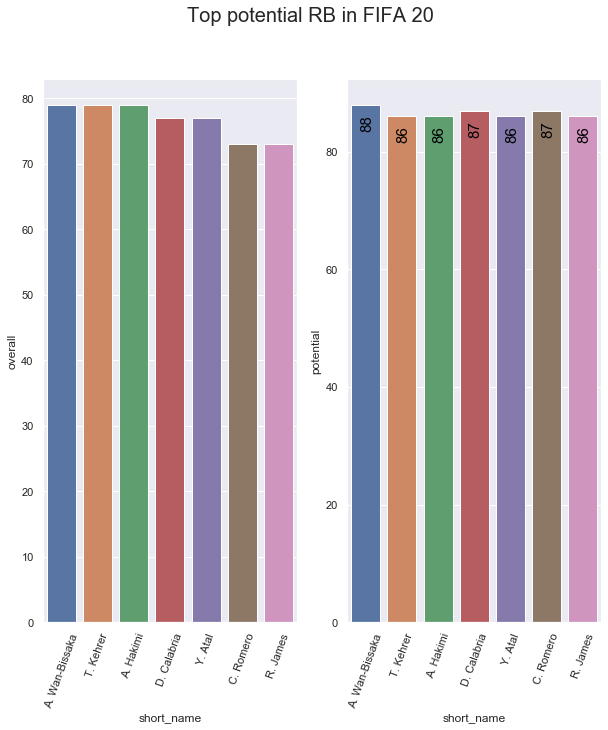

In [96]:
figure,ax=plt.subplots(1,2)
figure.set_size_inches(10,10)
figure=plt.gcf()
sns.set(style='darkgrid')
sns.barplot(fifa_potential_RB.short_name,fifa_potential_RB.overall,ax=ax[0])
sns.barplot(fifa_potential_RB.short_name,fifa_potential_RB.potential,ax=ax[1])
count=0
for i in fifa_potential_RB.potential:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
figure.suptitle('Top potential RB in FIFA 20 ',fontsize=20)
ax[0].tick_params(axis="x", rotation=70)
ax[1].tick_params(axis="x", rotation=70)

In [84]:
def scatter_plot(cnt_srs, color):
   trace = go.Scatter(
       x=cnt_srs.index[::-1],
       y=cnt_srs.values[::-1],
       showlegend=False,
       marker=dict(
           color=color,
       ),
   )
   return trace
cnt_srs = fifa_potential_RB.value_eur
cnt_srs.index = fifa_potential_RB.short_name
trace1 = scatter_plot(cnt_srs, 'red')
subtitles = ["Top potential RB in FIFA 20"]
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                         subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')

# TOP potential CB in FIFA 20

In [20]:
position="CB"
fifa_potential_cb=fifa_potential_ready[fifa.player_positions.str.contains(position)]

In [21]:
fifa_potential_cb

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
573,237678,https://sofifa.com/player/237678/ibrahima-kona...,I. Konaté,Ibrahima Konaté,20,1999-05-25,192,93,France,RB Leipzig,...,70+2,73+2,73+2,73+2,70+2,72+2,78+2,78+2,78+2,72+2
582,226229,https://sofifa.com/player/226229/thilo-kehrer/...,T. Kehrer,Thilo Kehrer,22,1996-09-21,186,76,Germany,Paris Saint-Germain,...,74+2,74+2,74+2,74+2,74+2,75+2,77+2,77+2,77+2,75+2
588,238476,https://sofifa.com/player/238476/dan-axel-zaga...,D. Zagadou,Dan-Axel Zagadou,20,1999-06-03,196,90,France,Borussia Dortmund,...,67+2,73+2,73+2,73+2,67+2,70+2,78+2,78+2,78+2,70+2
755,234378,https://sofifa.com/player/234378/declan-rice/2...,D. Rice,Declan Rice,20,1999-01-14,185,80,England,West Ham United,...,70+2,76+2,76+2,76+2,70+2,71+2,76+2,76+2,76+2,71+2
758,242236,https://sofifa.com/player/242236/francisco-rei...,Ferro,Francisco Reis Ferreira,22,1997-03-26,192,78,Portugal,SL Benfica,...,68+2,75+2,75+2,75+2,68+2,69+2,77+2,77+2,77+2,69+2
759,224221,https://sofifa.com/player/224221/joachim-ander...,J. Andersen,Joachim Andersen,23,1996-05-31,192,90,Denmark,Olympique Lyonnais,...,66+2,72+2,72+2,72+2,66+2,68+2,76+2,76+2,76+2,68+2
761,231633,https://sofifa.com/player/231633/issa-diop/20/...,I. Diop,Issa Diop,22,1997-01-09,194,92,France,West Ham United,...,67+2,71+2,71+2,71+2,67+2,70+2,77+2,77+2,77+2,70+2
992,229558,https://sofifa.com/player/229558/dayot-upameca...,D. Upamecano,Dayotchanculle Upamecano,20,1998-10-27,185,83,France,RB Leipzig,...,68+2,71+2,71+2,71+2,68+2,70+2,76+2,76+2,76+2,70+2
1001,236355,https://sofifa.com/player/236355/luiz-felipe-r...,Luiz Felipe,Luiz Felipe Ramos Marchi,22,1997-03-22,187,80,Brazil,Lazio,...,70+2,72+2,72+2,72+2,70+2,72+2,75+2,75+2,75+2,72+2
1262,229582,https://sofifa.com/player/229582/gianluca-manc...,G. Mancini,Gianluca Mancini,23,1996-04-17,190,77,Italy,Roma,...,64+2,67+2,67+2,67+2,64+2,67+2,74+2,74+2,74+2,67+2


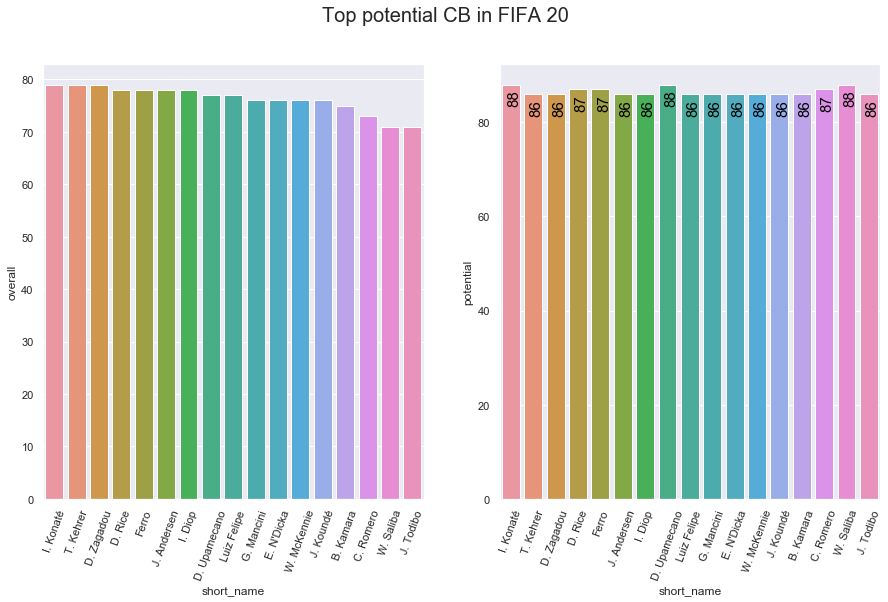

In [97]:
figure,ax=plt.subplots(1,2)
figure.set_size_inches(15,8)
figure=plt.gcf()
sns.set(style='darkgrid')
sns.barplot(fifa_potential_cb.short_name,fifa_potential_cb.overall,ax=ax[0])
sns.barplot(fifa_potential_cb.short_name,fifa_potential_cb.potential,ax=ax[1])
count=0
for i in fifa_potential_cb.potential:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
figure.suptitle('Top potential CB in FIFA 20 ',fontsize=20)
ax[0].tick_params(axis="x", rotation=70)
ax[1].tick_params(axis="x", rotation=70)

In [85]:
def scatter_plot(cnt_srs, color):
   trace = go.Scatter(
       x=cnt_srs.index[::-1],
       y=cnt_srs.values[::-1],
       showlegend=False,
       marker=dict(
           color=color,
       ),
   )
   return trace
cnt_srs = fifa_potential_cb.value_eur
cnt_srs.index = fifa_potential_cb.short_name
trace1 = scatter_plot(cnt_srs, 'red')
subtitles = ["Potential CB player values(Euros)"]
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                         subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')

# TOP potential players in CM position

In [24]:
position="CM"
fifa_potential_cm=fifa_potential_ready[fifa.player_positions.str.contains(position)]

In [25]:
fifa_potential_cm.player_positions

569               CM
570          CAM, CM
574      CM, CDM, LM
575          CDM, CM
576     CM, CAM, CDM
578      CAM, LM, CM
579      CDM, CM, LM
584               CM
586          CDM, CM
587          CDM, CM
755      CDM, CB, CM
756               CM
757      CAM, RM, CM
760          CM, CDM
995      CM, RM, CAM
996          CDM, CM
1254         CAM, CM
1258         CDM, CM
1259         CM, CDM
1260         CM, CDM
1267     CM, CB, CAM
1268     CAM, CM, LM
1615         CDM, CM
1617    CM, CDM, RWB
1618         CAM, CM
1620         CM, CDM
2121     CAM, RM, CM
2122     CAM, CM, RW
3293         CM, CDM
4042              CM
Name: player_positions, dtype: object

In [26]:
fifa_potential_cm[fifa_potential_cm.player_positions=="CM"]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
569,227535,https://sofifa.com/player/227535/rodrigo-benta...,R. Bentancur,Rodrigo Bentancur Colmán,22,1997-06-25,187,72,Uruguay,Juventus,...,75+2,76+2,76+2,76+2,75+2,73+2,71+2,71+2,71+2,73+2
584,230938,https://sofifa.com/player/230938/franck-yannic...,F. Kessié,Franck Yannick Kessié,22,1996-12-19,183,76,Ivory Coast,Milan,...,77+2,79+2,79+2,79+2,77+2,77+2,78+2,78+2,78+2,77+2
756,234943,https://sofifa.com/player/234943/florian-neuha...,F. Neuhaus,Florian Neuhaus,22,1997-03-16,183,74,Germany,Borussia Mönchengladbach,...,70+2,72+2,72+2,72+2,70+2,69+2,65+2,65+2,65+2,69+2
4042,242816,https://sofifa.com/player/242816/ricard-puig-m...,Riqui Puig,Ricard Puig Martí,19,1999-08-13,169,56,Spain,FC Barcelona,...,62+2,63+2,63+2,63+2,62+2,60+2,55+2,55+2,55+2,60+2


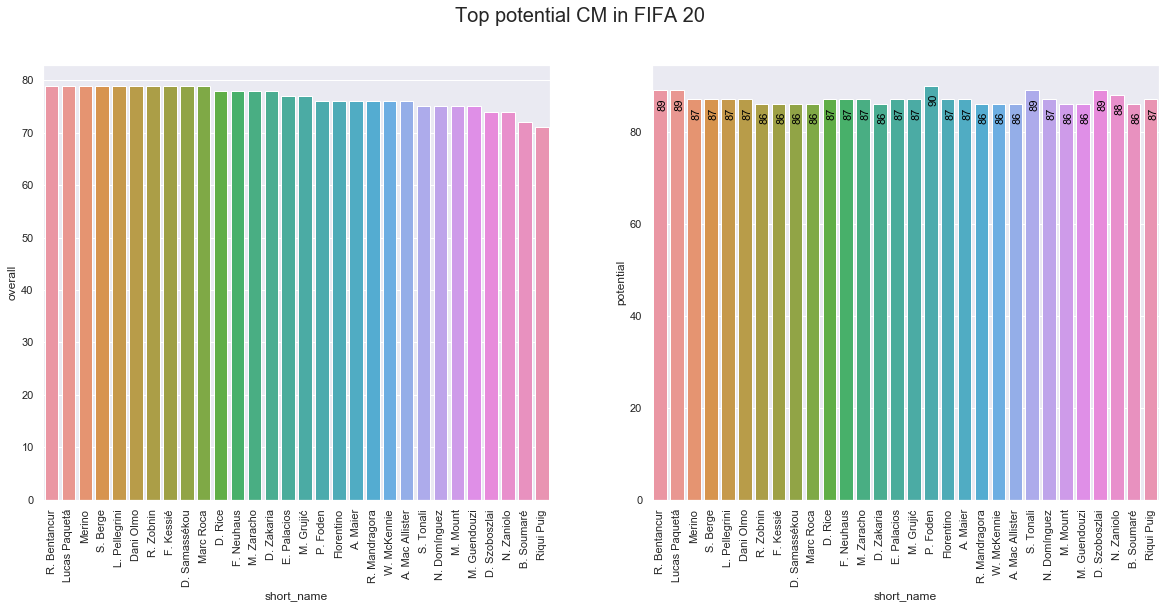

In [98]:
figure,ax=plt.subplots(1,2)
figure.set_size_inches(20,8)
figure=plt.gcf()
sns.set(style='darkgrid')
sns.barplot(fifa_potential_cm.short_name,fifa_potential_cm.overall,ax=ax[0])
sns.barplot(fifa_potential_cm.short_name,fifa_potential_cm.potential,ax=ax[1])
count=0
for i in fifa_potential_cm.potential:
    plt.text(count-0.15,i-4,str(i),size=11,color='black',rotation=90)
    count+=1
figure.suptitle('Top potential CM in FIFA 20 ',fontsize=20)
ax[0].tick_params(axis="x", rotation=90)
ax[1].tick_params(axis="x", rotation=90)

In [86]:
def scatter_plot(cnt_srs, color):
   trace = go.Scatter(
       x=cnt_srs.index[::-1],
       y=cnt_srs.values[::-1],
       showlegend=False,
       marker=dict(
           color=color,
       ),
   )
   return trace
cnt_srs = fifa_potential_cm.value_eur
cnt_srs.index = fifa_potential_cm.short_name
trace1 = scatter_plot(cnt_srs, 'red')
subtitles = ["Potential CM player values(Euros) "]
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                         subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')

# Top potential players in CAM position

In [29]:
position="CAM"
fifa_potential_cam=fifa_potential_ready[fifa.player_positions.str.contains(position)]

In [30]:
fifa_potential_cam

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
570,233927,https://sofifa.com/player/233927/lucas-tolenti...,Lucas Paquetá,Lucas Tolentino Coelho de Lima,21,1997-08-27,180,72,Brazil,Milan,...,70+2,70+2,70+2,70+2,70+2,68+2,65+2,65+2,65+2,68+2
576,228251,https://sofifa.com/player/228251/lorenzo-pelle...,L. Pellegrini,Lorenzo Pellegrini,23,1996-06-19,186,77,Italy,Roma,...,74+2,75+2,75+2,75+2,74+2,73+2,71+2,71+2,71+2,73+2
578,244260,https://sofifa.com/player/244260/daniel-olmo-c...,Dani Olmo,Daniel Olmo Carvajal,21,1998-05-07,179,72,Spain,Dinamo Zagreb,...,67+2,64+2,64+2,64+2,67+2,63+2,54+2,54+2,54+2,63+2
757,235926,https://sofifa.com/player/235926/matias-zarach...,M. Zaracho,Matías Zaracho,21,1998-03-03,171,64,Argentina,Racing Club,...,71+2,69+2,69+2,69+2,71+2,69+2,63+2,63+2,63+2,69+2
763,234612,https://sofifa.com/player/234612/jonathan-ikon...,J. Ikoné,Nanitamo Jonathan Ikoné,21,1998-05-02,175,73,France,LOSC Lille,...,60+2,55+2,55+2,55+2,60+2,56+2,45+2,45+2,45+2,56+2
995,231521,https://sofifa.com/player/231521/exequiel-pala...,E. Palacios,Exequiel Palacios,20,1998-10-05,177,66,Argentina,River Plate,...,73+2,73+2,73+2,73+2,73+2,72+2,69+2,69+2,69+2,72+2
998,220196,https://sofifa.com/player/220196/david-brooks/...,D. Brooks,David Brooks,21,1997-07-08,183,62,Wales,Bournemouth,...,64+2,62+2,62+2,62+2,64+2,61+2,55+2,55+2,55+2,61+2
999,228819,https://sofifa.com/player/228819/matias-vargas...,M. Vargas,Matías Vargas,22,1997-05-08,168,66,Argentina,RCD Espanyol,...,64+2,60+2,60+2,60+2,64+2,60+2,50+2,50+2,50+2,60+2
1000,235944,https://sofifa.com/player/235944/brais-mendez-...,Brais Méndez,Brais Méndez Portela,22,1997-01-07,187,76,Spain,RC Celta,...,64+2,63+2,63+2,63+2,64+2,61+2,56+2,56+2,56+2,61+2
1254,237692,https://sofifa.com/player/237692/phil-foden/20...,P. Foden,Philip Foden,19,2000-05-28,171,69,England,Manchester City,...,66+2,66+2,66+2,66+2,66+2,63+2,56+2,56+2,56+2,63+2


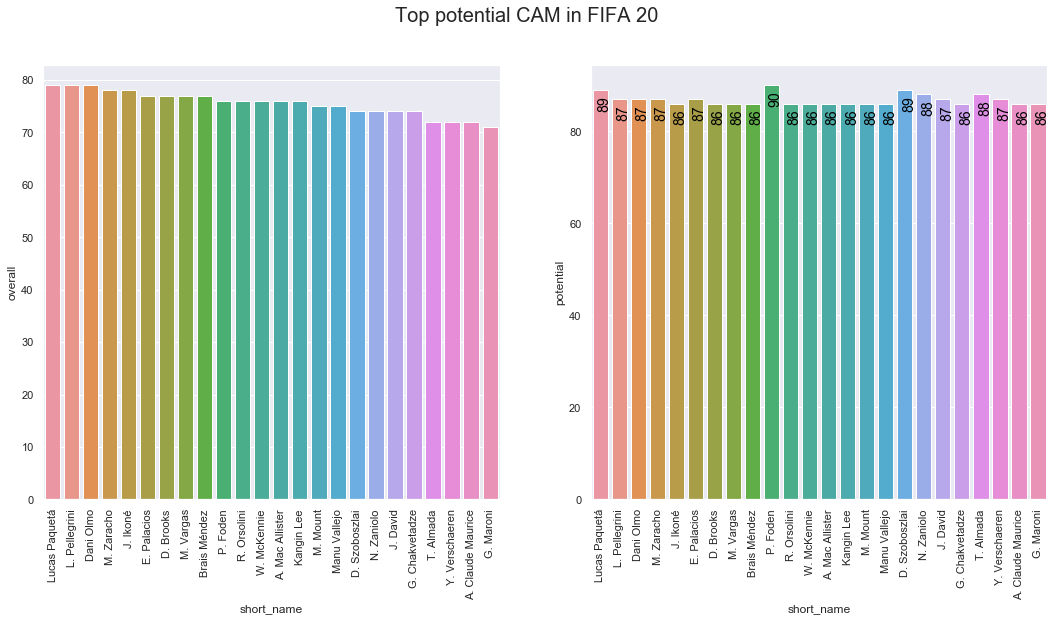

In [99]:
figure,ax=plt.subplots(1,2)
figure.set_size_inches(18,8)
figure=plt.gcf()
sns.set(style='darkgrid')
sns.barplot(fifa_potential_cam.short_name,fifa_potential_cam.overall,ax=ax[0])
sns.barplot(fifa_potential_cam.short_name,fifa_potential_cam.potential,ax=ax[1])
count=0
for i in fifa_potential_cam.potential:
    plt.text(count-0.15,i-4,str(i),size=14,color='black',rotation=90)
    count+=1
figure.suptitle('Top potential CAM in FIFA 20 ',fontsize=20)
ax[0].tick_params(axis="x", rotation=90)
ax[1].tick_params(axis="x", rotation=90)

In [87]:
def scatter_plot(cnt_srs, color):
   trace = go.Scatter(
       x=cnt_srs.index[::-1],
       y=cnt_srs.values[::-1],
       showlegend=False,
       marker=dict(
           color=color,
       ),
   )
   return trace
cnt_srs = fifa_potential_cam.value_eur
cnt_srs.index = fifa_potential_cam.short_name
trace1 = scatter_plot(cnt_srs, 'red')
subtitles = ["Potential CAM player values(Euros)"]
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                         subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')

# Top potential players in CDM position

In [33]:
position="CDM"
fifa_potential_cdm=fifa_potential_ready[fifa.player_positions.str.contains(position)]

In [34]:
fifa_potential_cdm

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
574,225193,https://sofifa.com/player/225193/mikel-merino-...,Merino,Mikel Merino Zazón,23,1996-06-22,186,83,Spain,Real Sociedad,...,73+2,75+2,75+2,75+2,73+2,72+2,73+2,73+2,73+2,72+2
575,228092,https://sofifa.com/player/228092/sander-berge/...,S. Berge,Sander Berge,21,1998-02-18,195,94,Norway,KRC Genk,...,75+2,77+2,77+2,77+2,75+2,75+2,77+2,77+2,77+2,75+2
576,228251,https://sofifa.com/player/228251/lorenzo-pelle...,L. Pellegrini,Lorenzo Pellegrini,23,1996-06-19,186,77,Italy,Roma,...,74+2,75+2,75+2,75+2,74+2,73+2,71+2,71+2,71+2,73+2
579,213160,https://sofifa.com/player/213160/roman-zobnin/...,R. Zobnin,Roman Zobnin,25,1994-02-11,182,75,Russia,Spartak Moscow,...,78+2,78+2,78+2,78+2,78+2,77+2,75+2,75+2,75+2,77+2
586,235424,https://sofifa.com/player/235424/diadie-samass...,D. Samassékou,Diadie Samassékou,23,1996-01-11,177,68,Mali,TSG 1899 Hoffenheim,...,75+2,77+2,77+2,77+2,75+2,75+2,76+2,76+2,76+2,75+2
587,235945,https://sofifa.com/player/235945/marc-roca-jun...,Marc Roca,Marc Roca Junqué,22,1996-11-26,184,74,Spain,RCD Espanyol,...,73+2,77+2,77+2,77+2,73+2,72+2,70+2,70+2,70+2,72+2
755,234378,https://sofifa.com/player/234378/declan-rice/2...,D. Rice,Declan Rice,20,1999-01-14,185,80,England,West Ham United,...,70+2,76+2,76+2,76+2,70+2,71+2,76+2,76+2,76+2,71+2
760,229261,https://sofifa.com/player/229261/denis-zakaria...,D. Zakaria,Denis Lemi Zakaria Lako Lado,22,1996-11-20,191,80,Switzerland,Borussia Mönchengladbach,...,77+2,80+2,80+2,80+2,77+2,77+2,79+2,79+2,79+2,77+2
996,232099,https://sofifa.com/player/232099/marko-grujic/...,M. Grujić,Marko Grujić,23,1996-04-13,191,86,Serbia,Hertha BSC,...,72+2,75+2,75+2,75+2,72+2,72+2,75+2,75+2,75+2,72+2
1258,234569,https://sofifa.com/player/234569/florentino-mo...,Florentino,Florentino Morris Luís,19,1999-08-19,184,73,Portugal,SL Benfica,...,70+2,74+2,74+2,74+2,70+2,71+2,74+2,74+2,74+2,71+2


In [100]:
figure.set_size_inches(18,8)
figure=plt.gcf()
plt.xticks(rotation="70")
sns.set(style='darkgrid')
plt.xticks(rotation="70")
sns.barplot(fifa_potential_cdm.short_name,fifa_potential_cdm.overall,ax=ax[0])
plt.xticks(rotation="70")
sns.barplot(fifa_potential_cdm.short_name,fifa_potential_cdm.potential,ax=ax[1])
count=0
for i in fifa_potential_cdm.potential:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
figure.suptitle('Top potential CDM in FIFA 20 ',fontsize=20)
ax[0].tick_params(axis="x", rotation=70)
ax[1].tick_params(axis="x", rotation=70)

In [88]:
def scatter_plot(cnt_srs, color):
   trace = go.Scatter(
       x=cnt_srs.index[::-1],
       y=cnt_srs.values[::-1],
       showlegend=False,
       marker=dict(
           color=color,
       ),
   )
   return trace
cnt_srs = fifa_potential_cdm.value_eur
cnt_srs.index = fifa_potential_cdm.short_name
trace1 = scatter_plot(cnt_srs, 'red')
subtitles = ["Potential CDM player values(Euros)"]
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                         subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')

# Top Potential LW players in FIFA 20

In [37]:
position="LW"
fifa_potential_lw=fifa_potential_ready[fifa.player_positions.str.contains(position)]

In [38]:
fifa_potential_lw

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
568,238794,https://sofifa.com/player/238794/vinicius-jose...,Vinícius Jr.,Vinícius José de Oliveira Júnior,18,2000-07-12,176,73,Brazil,Real Madrid,...,58+2,53+2,53+2,53+2,58+2,53+2,43+2,43+2,43+2,53+2
580,216388,https://sofifa.com/player/216388/allan-saint-m...,A. Saint-Maximin,Allan Saint-Maximin,22,1997-03-12,173,67,France,Newcastle United,...,56+2,50+2,50+2,50+2,56+2,51+2,39+2,39+2,39+2,51+2
581,224254,https://sofifa.com/player/224254/cristian-pavo...,C. Pavón,Cristian David Pavón,23,1996-01-21,174,78,Argentina,LA Galaxy,...,67+2,63+2,63+2,63+2,67+2,63+2,56+2,56+2,56+2,63+2
583,227796,https://sofifa.com/player/227796/christian-pul...,C. Pulisic,Christian Pulisic,20,1998-09-18,177,69,United States,Chelsea,...,62+3,56+3,56+3,56+3,62+3,59+3,47+3,47+3,47+3,59+3
999,228819,https://sofifa.com/player/228819/matias-vargas...,M. Vargas,Matías Vargas,22,1997-05-08,168,66,Argentina,RCD Espanyol,...,64+2,60+2,60+2,60+2,64+2,60+2,50+2,50+2,50+2,60+2
1256,243812,https://sofifa.com/player/243812/rodrygo-silva...,Rodrygo,Rodrygo Silva de Goes,18,2001-01-09,174,64,Brazil,Real Madrid,...,56+2,48+2,48+2,48+2,56+2,52+2,41+2,41+2,41+2,52+2
1619,235883,https://sofifa.com/player/235883/ryan-sessegno...,R. Sessegnon,Ryan Sessegnon,19,2000-05-18,178,71,England,Tottenham Hotspur,...,71+2,67+2,67+2,67+2,71+2,70+2,64+2,64+2,64+2,70+2
1622,236920,https://sofifa.com/player/236920/justin-kluive...,J. Kluivert,Justin Kluivert,20,1999-05-05,171,66,Netherlands,Roma,...,57+2,52+2,52+2,52+2,57+2,54+2,46+2,46+2,46+2,54+2
2123,240740,https://sofifa.com/player/240740/callum-hudson...,C. Hudson-Odoi,Callum Hudson-Odoi,18,2000-11-07,177,75,England,Chelsea,...,55+2,51+2,51+2,51+2,55+2,52+2,43+2,43+2,43+2,52+2
2652,231410,https://sofifa.com/player/231410/brahim-diaz/2...,Brahim,Brahim Díaz,19,1999-08-03,171,68,Spain,Real Madrid,...,52+2,47+2,47+2,47+2,52+2,47+2,37+2,37+2,37+2,47+2


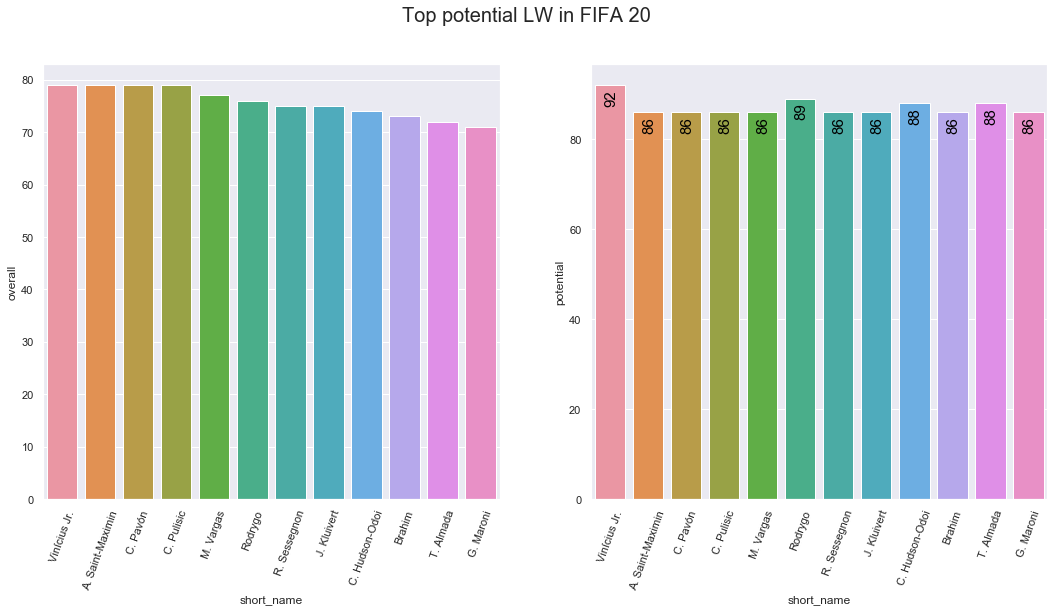

In [101]:
figure,ax=plt.subplots(1,2)
figure.set_size_inches(18,8)
figure=plt.gcf()
sns.set(style='darkgrid')
sns.barplot(fifa_potential_lw.short_name,fifa_potential_lw.overall,ax=ax[0])
sns.barplot(fifa_potential_lw.short_name,fifa_potential_lw.potential,ax=ax[1])
count=0
for i in fifa_potential_lw.potential:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
figure.suptitle('Top potential LW in FIFA 20 ',fontsize=20)
ax[0].tick_params(axis="x", rotation=70)
ax[1].tick_params(axis="x", rotation=70)

In [89]:
def scatter_plot(cnt_srs, color):
   trace = go.Scatter(
       x=cnt_srs.index[::-1],
       y=cnt_srs.values[::-1],
       showlegend=False,
       marker=dict(
           color=color,
       ),
   )
   return trace
cnt_srs = fifa_potential_lw.value_eur
cnt_srs.index = fifa_potential_lw.short_name
trace1 = scatter_plot(cnt_srs, 'red')
subtitles = ["Potential LW player values(Euros)"]
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                         subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')

# Top Potential RW in FIFA 20

In [41]:
position="RW"
fifa_potential_rw=fifa_potential_ready[fifa.player_positions.str.contains(position)]

In [42]:
fifa_potential_rw

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
577,235805,https://sofifa.com/player/235805/federico-chie...,F. Chiesa,Federico Chiesa,21,1997-10-25,175,70,Italy,Fiorentina,...,63+2,59+2,59+2,59+2,63+2,59+2,51+2,51+2,51+2,59+2
580,216388,https://sofifa.com/player/216388/allan-saint-m...,A. Saint-Maximin,Allan Saint-Maximin,22,1997-03-12,173,67,France,Newcastle United,...,56+2,50+2,50+2,50+2,56+2,51+2,39+2,39+2,39+2,51+2
581,224254,https://sofifa.com/player/224254/cristian-pavo...,C. Pavón,Cristian David Pavón,23,1996-01-21,174,78,Argentina,LA Galaxy,...,67+2,63+2,63+2,63+2,67+2,63+2,56+2,56+2,56+2,63+2
583,227796,https://sofifa.com/player/227796/christian-pul...,C. Pulisic,Christian Pulisic,20,1998-09-18,177,69,United States,Chelsea,...,62+3,56+3,56+3,56+3,62+3,59+3,47+3,47+3,47+3,59+3
764,235889,https://sofifa.com/player/235889/cengiz-under/...,C. Ünder,Cengiz Ünder,21,1997-07-14,173,66,Turkey,Roma,...,59+2,53+2,53+2,53+2,59+2,56+2,44+2,44+2,44+2,56+2
1002,240754,https://sofifa.com/player/240754/youcef-atal/2...,Y. Atal,Youcef Attal,23,1996-05-17,176,70,Algeria,OGC Nice,...,77+2,74+2,74+2,74+2,77+2,76+2,72+2,72+2,72+2,76+2
1256,243812,https://sofifa.com/player/243812/rodrygo-silva...,Rodrygo,Rodrygo Silva de Goes,18,2001-01-09,174,64,Brazil,Real Madrid,...,56+2,48+2,48+2,48+2,56+2,52+2,41+2,41+2,41+2,52+2
1264,232999,https://sofifa.com/player/232999/tyler-adams/2...,T. Adams,Tyler Adams,20,1999-02-14,176,68,United States,RB Leipzig,...,72+2,74+2,74+2,74+2,72+2,72+2,72+2,72+2,72+2,72+2
1265,233556,https://sofifa.com/player/233556/riccardo-orso...,R. Orsolini,Riccardo Orsolini,22,1997-01-24,183,73,Italy,Bologna,...,60+2,56+2,56+2,56+2,60+2,55+2,47+2,47+2,47+2,55+2
1617,237819,https://sofifa.com/player/237819/nicolas-domin...,N. Domínguez,Nicolás Domínguez,21,1998-06-28,179,73,Argentina,Vélez Sarsfield,...,74+2,74+2,74+2,74+2,74+2,74+2,72+2,72+2,72+2,74+2


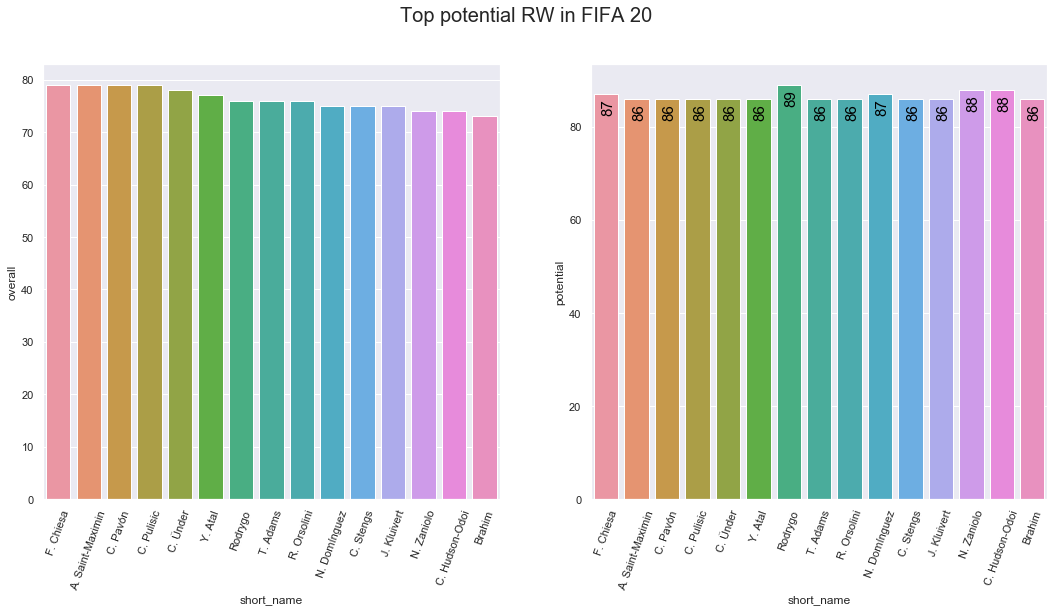

In [102]:
figure,ax=plt.subplots(1,2)
figure.set_size_inches(18,8)
figure=plt.gcf()
sns.set(style='darkgrid')
sns.barplot(fifa_potential_rw.short_name,fifa_potential_rw.overall,ax=ax[0])
sns.barplot(fifa_potential_rw.short_name,fifa_potential_rw.potential,ax=ax[1])
count=0
for i in fifa_potential_rw.potential:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
figure.suptitle('Top potential RW in FIFA 20 ',fontsize=20)
ax[0].tick_params(axis="x", rotation=70)
ax[1].tick_params(axis="x", rotation=70)

In [90]:
def scatter_plot(cnt_srs, color):
   trace = go.Scatter(
       x=cnt_srs.index[::-1],
       y=cnt_srs.values[::-1],
       showlegend=False,
       marker=dict(
           color=color,
       ),
   )
   return trace
cnt_srs = fifa_potential_rw.value_eur
cnt_srs.index = fifa_potential_rw.short_name
trace1 = scatter_plot(cnt_srs, 'red')
subtitles = ["Potential RW player values(Euros) "]
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                         subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')

# Top potential Players in ST position in FIFA 20

In [45]:
position="ST"
fifa_potential_st=fifa_potential_ready[fifa.player_positions.str.contains(position)]

In [46]:
fifa_potential_st

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
580,216388,https://sofifa.com/player/216388/allan-saint-m...,A. Saint-Maximin,Allan Saint-Maximin,22,1997-03-12,173,67,France,Newcastle United,...,56+2,50+2,50+2,50+2,56+2,51+2,39+2,39+2,39+2,51+2
581,224254,https://sofifa.com/player/224254/cristian-pavo...,C. Pavón,Cristian David Pavón,23,1996-01-21,174,78,Argentina,LA Galaxy,...,67+2,63+2,63+2,63+2,67+2,63+2,56+2,56+2,56+2,63+2
762,234045,https://sofifa.com/player/234045/henry-onyekur...,H. Onyekuru,Henry Onyekuru,22,1997-06-05,175,59,Nigeria,AS Monaco,...,57+2,52+2,52+2,52+2,57+2,54+2,45+2,45+2,45+2,54+2
997,237715,https://sofifa.com/player/237715/patrick-cutro...,P. Cutrone,Patrick Cutrone,21,1998-01-03,183,78,Italy,Wolverhampton Wanderers,...,49+2,46+2,46+2,46+2,49+2,47+2,45+2,45+2,45+2,47+2
1255,236610,https://sofifa.com/player/236610/moise-kean/20...,M. Kean,Moise Kean,19,2000-02-28,182,79,Italy,Everton,...,49+2,46+2,46+2,46+2,49+2,47+2,44+2,44+2,44+2,47+2
1256,243812,https://sofifa.com/player/243812/rodrygo-silva...,Rodrygo,Rodrygo Silva de Goes,18,2001-01-09,174,64,Brazil,Real Madrid,...,56+2,48+2,48+2,48+2,56+2,52+2,41+2,41+2,41+2,52+2
1625,241686,https://sofifa.com/player/241686/manuel-vallej...,Manu Vallejo,Manuel Vallejo Galván,22,1997-02-14,167,72,Spain,Valencia CF,...,58+2,53+2,53+2,53+2,58+2,55+2,49+2,49+2,49+2,55+2
1626,241721,https://sofifa.com/player/241721/rafael-da-con...,Rafael Leão,Rafael da Conceição Leão,20,1999-06-10,188,81,Portugal,Milan,...,53+2,49+2,49+2,49+2,53+2,49+2,43+2,43+2,43+2,49+2
2124,243630,https://sofifa.com/player/243630/jonathan-davi...,J. David,Jonathan David,19,2000-01-14,177,77,Canada,KAA Gent,...,50+2,48+2,48+2,48+2,50+2,47+2,40+2,40+2,40+2,47+2
3288,245371,https://sofifa.com/player/245371/thiago-almada...,T. Almada,Thiago Almada,18,2001-04-26,171,62,Argentina,Vélez Sarsfield,...,56+2,53+2,53+2,53+2,56+2,53+2,45+2,45+2,45+2,53+2


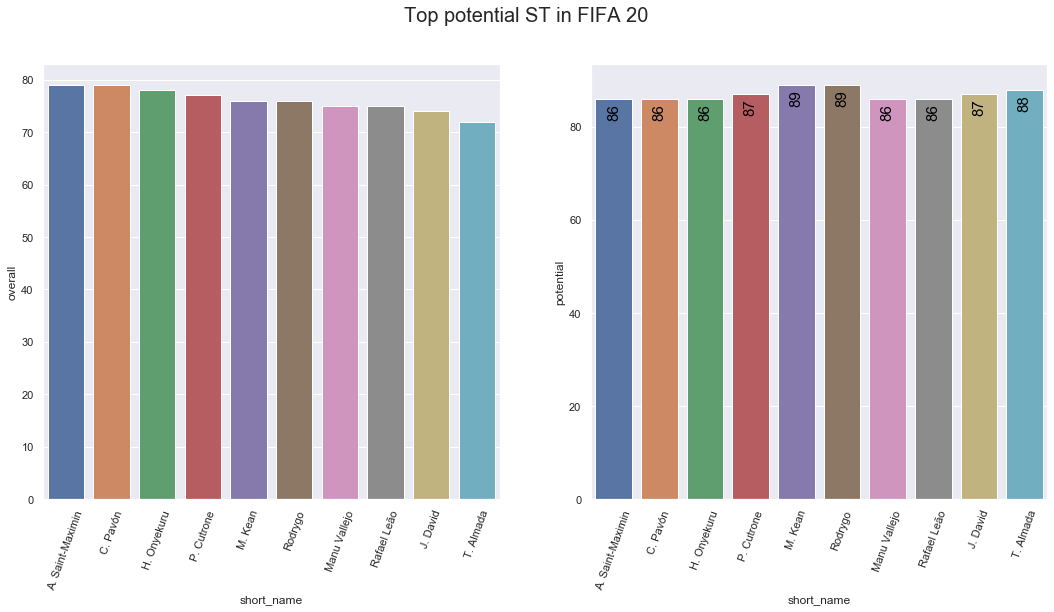

In [105]:
figure,ax=plt.subplots(1,2)
figure.set_size_inches(18,8)
figure=plt.gcf()
sns.set(style='darkgrid')
sns.barplot(fifa_potential_st.short_name,fifa_potential_st.overall,ax=ax[0])
sns.barplot(fifa_potential_st.short_name,fifa_potential_st.potential,ax=ax[1])
count=0
for i in fifa_potential_st.potential:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
figure.suptitle('Top potential ST in FIFA 20 ',fontsize=20)
ax[0].tick_params(axis="x", rotation=70)
ax[1].tick_params(axis="x", rotation=70)


In [91]:
def scatter_plot(cnt_srs, color):
   trace = go.Scatter(
       x=cnt_srs.index[::-1],
       y=cnt_srs.values[::-1],
       showlegend=False,
       marker=dict(
           color=color,
       ),
   )
   return trace
cnt_srs = fifa_potential_st.value_eur
cnt_srs.index = fifa_potential_st.short_name
trace1 = scatter_plot(cnt_srs, 'red')
subtitles = ["Top potential ST in FIFA 20  "]
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                         subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')

# Top potential players in CF positon in FIFA 20

In [49]:
position="CF"
fifa_potential_cf=fifa_potential_ready[fifa.player_positions.str.contains(position)]

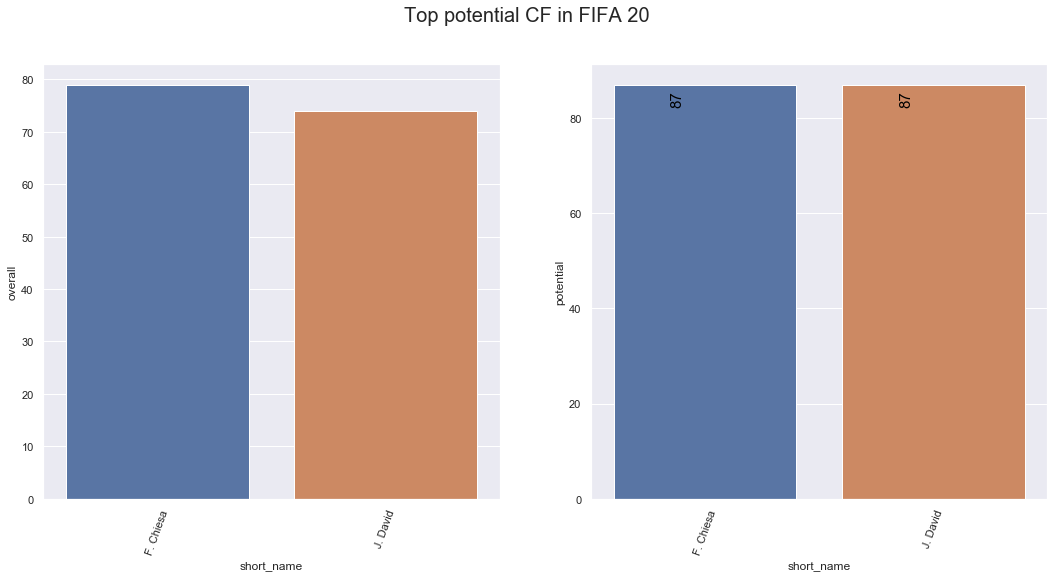

In [106]:
figure,ax=plt.subplots(1,2)
figure.set_size_inches(18,8)
figure=plt.gcf()
sns.set(style='darkgrid')
sns.barplot(fifa_potential_cf.short_name,fifa_potential_cf.overall,ax=ax[0])
sns.barplot(fifa_potential_cf.short_name,fifa_potential_cf.potential,ax=ax[1])
count=0
for i in fifa_potential_cf.potential:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
figure.suptitle('Top potential CF in FIFA 20 ',fontsize=20)
ax[0].tick_params(axis="x", rotation=70)
ax[1].tick_params(axis="x", rotation=70)

In [93]:
def scatter_plot(cnt_srs, color):
   trace = go.Scatter(
       x=cnt_srs.index[::-1],
       y=cnt_srs.values[::-1],
       showlegend=False,
       marker=dict(
           color=color,
       ),
   )
   return trace
cnt_srs = fifa_potential_cf.value_eur
cnt_srs.index = fifa_potential_cf.short_name
trace1 = scatter_plot(cnt_srs, 'red')
subtitles = ["Potential CF player values(Euros)"]
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                         subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')